# ch 4. coefficient f test 

이전 챕터에서 t-test를 이용하여 각각의 회귀 계수들의 유의성을 검정하는 방법에 대해서 알아보았습니다. 이번 챕터에서는 f-test를 이용해서 회귀 계수들의 유의성을 검정하는 또 다른 방법에 대해서 배워보겠습니다.

## 모델 준비

In [1]:
from utils import load_house_dataset
import statsmodels.api as sm

x_train, x_test, y_train, y_test = load_house_dataset()
x_train = x_train["sqft_living"]
x_test = x_test["sqft_living"]

x_constant_train = sm.add_constant(x_train, has_constant="add")
model = sm.OLS(y_train, x_constant_train)
results = model.fit()

In [2]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                 1.659e+04
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:34:15   Log-Likelihood:            -2.3990e+05
No. Observations:               17280   AIC:                         4.798e+05
Df Residuals:                   17278   BIC:                         4.798e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.142e+04   4920.466     -8.418      0.000   -5.11e+04   -3.18e+04
sqft_living   279.9269      2.173    128.793      0.000     275.667     284.187
==============================================================================
Omnibus:                    11627.704   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           395396.345
Skew:                           2.766   Prob(JB):                         0.00
Kurtosis:                      25.772   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 회귀 계수 유의성 검정: f-test

첫 번째 표의 f 값과 f 값에 대한 p-value 부분을 살펴보겠습니다. f-value는 ANOVA(분산 분석) 시간에 배웠던 개념이었습니다. 이는 두 분산의 비율로 계산할 수 있었습니다. 그렇다면 단순 선형회귀에 어떻게 적용할 수 있는지 살펴보겠습니다.

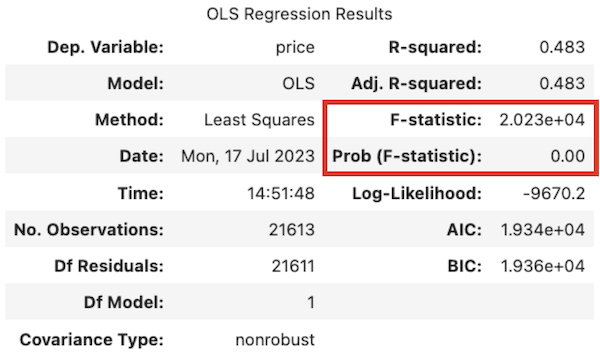

### 가설 설정

먼저 단순 선형 회귀식은 아래와 같습니다.

$$Y=\beta_{0}+\beta_{1}X+\epsilon$$

단순 선형 회귀 식에서 기울기에 해당하는 β1의 유의성을 검정해보겠습니다. t-test와 동일하게 귀무가설과 대립가설을 세울 수 있습니다.

$$H_0:\beta_{1}=0$$
$$H_1:\beta_{1}\neq0$$

### SSE, SSR, MSE, MSR

f-test를 이해하기 위해서 이전 챕터에서 다뤘던 SSE, SSR, MSE, MSR의 수식을 가져오겠습니다.

$$SSE=\sum_{i=1}^{n}(y_i-{\hat{y}}_i)^2$$

$$SSR=\sum_{i=1}^{n}{({\hat{y}}_i-\bar{y})}^2$$

$$MSE=\frac{SSE}{n-2}=\frac{\sum_{i=1}^{n}(y_i-{\hat{y}}_i)^2}{n-2}\;(n:\text{데이터 샘플 개수})$$

$$MSR=\frac{SSR}{k}=\frac{\sum_{i=1}^{n}{({\hat{y}}_i-\bar{y})}^2}{k}\;(k:\text{회귀 계수 개수})$$

### 검정 통계량
f-test를 이용한 회귀 계수 유의성 검정에는 MSR과 MSE의 비율을 검정 통계량으로 사용합니다. MSE와 MSR은 각각 SSE와 SSR을 각각의 자유도로 나눠준 값입니다.

$$F=\frac{MSR}{MSE} \sim F_{k,n-2}$$

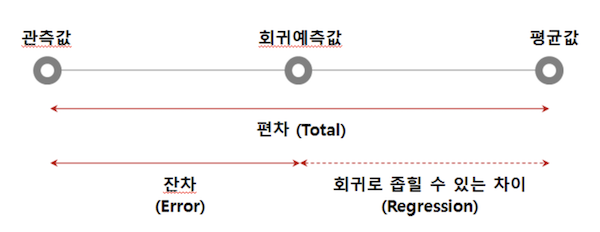

MSR은 회귀식을 통해 예측한 값과 평균 값 사이 차이로, 회귀로 설명할 수 있는 편차입니다. MSE는 회귀 식으로 예측한 값과 실제 값 사이의 차이로 회귀식으로도 설명할 수 없는 잔차입니다. 즉, MSR/MSE는 회귀로 좁힐 수 있는 값과 회귀로도 좁힐 수 없는 값 사이 비율입니다. 

이 값이 크다는 의미는 회귀식으로 설명할 수 있는 편차가 설명할 수 없는 편차보다 크다는 것이고 즉, 회귀 계수가 유의하다는 의미입니다. 회귀식이 유의하다는 것은 곧 β1이 0이 아니라는 것을 의미합니다. 따라서 회귀 계수에 대한 유의성 검정을 f 검정을 통해 수행할 수 있습니다. 

### p-value 계산 및 통계적 의사결정

검정 통계량을 계산한 다음, f 분포표를 이용해서 p-value를 계산하여 유의 수준과 비교하면 됩니다. 예제에서는 p-value가 유의수준보다 낮아서 회귀 계수가 유의하다고 검정하였습니다.

## t-test vs f-test

지금까지 회귀 계수의 유의성을 검정하는 2가지 기법에 대해서 알아보았습니다. 그렇다면 언제 f-test가 적용되고 언제 t-test가 적용되는 걸까요?

먼저 f-test는 전체 회귀 계수가 유의한지를 일괄적으로 검정할 때 사용합니다. 이는 statsmodels summary의 첫번째 표의 f-ststistics와  Pr(f-statistics)로 표기됩니다.

반면에 t-test는 회귀 계수 하나하나의 유의성을 검정할 때 사용됩니다. 이는 statsmodel summary에서 두번째 표에 t-value와 Pr(|t|)로 표기됩니다.

독립변수가 2개인 상황에서는 t-test와 f-test의 결과가 동일합니다. 독립 변수를 여러개 사용하는 다중 선형 회귀에서는 개별 회귀 계수의 유의성 검정은 t-test, 전체 회귀 계수의 유의성 검정은 f-test를 적용합니다. 

## 그 외의 지표들

이제 statsmodels summary의 첫번째 표와 두번째 표를 거의 해석할 수 있습니다. 세 번째 표는 다음 챕터에서 다루도록 하고, 첫번째 표와 두번째 표에서 안다룬 지표들만 간단히 짚고 넘어가겠습니다.

### Log Likelihood
- likelihood: 우도, 주어진 데이터를 특정 확률 분포의 모수로 모델링하는 것
- log likelihood: likelihood 값에 로그 씌운 값, 회귀식을 통해서 주어진 데이터 셋을 생성할 가능성을 수치로 나타냄
- 0에 가까울 수록 회귀식이 데이터 셋을 잘 설명한다고 해석 가능
    
### AIC
- Akaike Information Criterion의 약자
- 두 통계모델의 적합도를 비교할 때 사용하는 지표
- 작을 수록 좋음
    
$$AIC = -2 * log(likelihood) + 2 * k$$

### BIC
- Bayesian Information Criterion의 약자
- 마찬가지로 통계모델의 적합도를 비교할 때 사용하는 지표
- 작을 수록 좋음
    
$$BIC = -2 * log(likelihood) + k * log(n)$$

더 자세한 내용이 궁금하신 분들은 아래 링크를 참고해주세요.

https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a

## 정리

이번 챕터에서는 f-test를 이용해서 회귀 계수의 유의성을 검정하는 방법에 대해서 알아보았습니다. 그리고 어떤 상황에선 t-test를 적용하고, 어떤 상황에선 f-test를 적용하는지 짚었습니다. 이제 회귀 분석 결과 summary의 첫번째 표와 두번째 표의 의미를 파악할 수 있습니다.

이어지는 챕터는 도출된 회귀식이 오차항 전제 조건들을 만족하는지 검정하는 기법들에 대해서 배워보겠습니다.